In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

# 生成1000个用户的ID
user_ids = np.arange(1, 1001)

# 生成1000个用户的转化率，服从正态分布，均值为0.05，标准差为0.01
conversion_rates = np.random.normal(0.05, 0.01, 1000)

# 生成1000个用户的转化率提升，服从正态分布，算法A的均值为0.02，标准差为0.01；算法B的均值为0.03，标准差为0.01
rate_A = np.random.normal(0.1, 0.02, 1000)
rate_B = np.random.normal(0.15, 0.02, 1000)

# 计算每个用户在算法A和B下的最终转化率，即原转化率加上转化率提升
final_rate_A = conversion_rates + rate_A
final_rate_B = conversion_rates + rate_B

# 将用户ID和各种转化率合并成一个数据框
df = pd.DataFrame({'user_id': user_ids, 'conversion_rate': conversion_rates, 'rate_A': rate_A, 'rate_B': rate_B, 'final_rate_A': final_rate_A, 'final_rate_B': final_rate_B})

# 查看数据框的基本信息
df.describe()


,user_id,conversion_rate,rate_A,rate_B,final_rate_A,final_rate_B
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.049401,0.099176,0.150770,0.148576,0.200171
std,288.819436,0.010352,0.019751,0.020243,0.022392,0.023068
min,1.000000,0.018421,0.033625,0.091043,0.071214,0.127059
25%,250.750000,0.042349,0.086274,0.137572,0.133306,0.184899
50%,500.500000,0.049073,0.098982,0.150660,0.148687,0.201392
75%,750.250000,0.056445,0.113343,0.164289,0.163090,0.214900
max,1000.000000,0.089122,0.163257,0.233422,0.217269,0.302747


In [2]:
df.head()

,user_id,conversion_rate,rate_A,rate_B,final_rate_A,final_rate_B
0,1,0.059648,0.100259,0.139022,0.159908,0.198670
1,2,0.057937,0.152669,0.136291,0.210606,0.194227
2,3,0.046726,0.091933,0.165631,0.138659,0.212357
3,4,0.058293,0.102776,0.180720,0.161069,0.239013
4,5,0.050900,0.106445,0.160119,0.157345,0.211019


In [3]:
# 假设每种算法给每个用户推荐了10个商品
n_items = 10

# 计算每个用户购买推荐商品的数量，服从二项分布
purchases_A = np.random.binomial(n_items, final_rate_A)
purchases_B = np.random.binomial(n_items, final_rate_B)

# 将购买数量添加到数据框中
df['purchases_A'] = purchases_A
df['purchases_B'] = purchases_B

# 查看数据框的基本信息
df.describe()

,user_id,conversion_rate,rate_A,rate_B,final_rate_A,final_rate_B,purchases_A,purchases_B
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.049401,0.099176,0.150770,0.148576,0.200171,1.434000,2.038000
std,288.819436,0.010352,0.019751,0.020243,0.022392,0.023068,1.137074,1.299325
min,1.000000,0.018421,0.033625,0.091043,0.071214,0.127059,0.000000,0.000000
25%,250.750000,0.042349,0.086274,0.137572,0.133306,0.184899,1.000000,1.000000
50%,500.500000,0.049073,0.098982,0.150660,0.148687,0.201392,1.000000,2.000000
75%,750.250000,0.056445,0.113343,0.164289,0.163090,0.214900,2.000000,3.000000
max,1000.000000,0.089122,0.163257,0.233422,0.217269,0.302747,6.000000,7.000000


In [4]:
df.head()

,user_id,conversion_rate,rate_A,rate_B,final_rate_A,final_rate_B,purchases_A,purchases_B
0,1,0.059648,0.100259,0.139022,0.159908,0.198670,2,2
1,2,0.057937,0.152669,0.136291,0.210606,0.194227,1,4
2,3,0.046726,0.091933,0.165631,0.138659,0.212357,2,1
3,4,0.058293,0.102776,0.180720,0.161069,0.239013,1,1
4,5,0.050900,0.106445,0.160119,0.157345,0.211019,0,2


In [5]:
# 保存数据集
df.to_csv("dataset/case2.csv")

In [6]:
# 从AB中抽样一部分用户的购买情况，假设抽取20个用户
sample_size = 20
sample_df = df.sample(sample_size, random_state=20)

# 计算两种算法的平均转化率
conversion_rate_A = sample_df['purchases_A'].sum() / (n_items * len(sample_df))
conversion_rate_B = sample_df['purchases_B'].sum() / (n_items * len(sample_df))

# 打印两种算法的平均转化率
print(f'Conversion rate of algorithm A: {conversion_rate_A:.3f}')
print(f'Conversion rate of algorithm B: {conversion_rate_B:.3f}')

Conversion rate of algorithm A: 0.140
Conversion rate of algorithm B: 0.205


In [7]:
# 【实现方法1：掉包】
# 进行t检验，假设\sigma和\mu是未知的，使用双正态总体检验方式
t_stat, p_value = stats.ttest_ind(sample_df['purchases_A'], sample_df['purchases_B'], equal_var=False, alternative='less')

# 打印t统计量和p值
print(f't statistic: {t_stat:.3f}')
print(f'p value: {p_value:.3f}')

# 判断是否拒绝原假设
if p_value < 0.05:
    print('We reject the null hypothesis and conclude that there is a significant difference between the conversion rates of the two algorithms.')
else:
    print('We fail to reject the null hypothesis and conclude that there is no significant difference between the conversion rates of the two algorithms.')

t statistic: -1.961
p value: 0.029
We reject the null hypothesis and conclude that there is a significant difference between the conversion rates of the two algorithms.


In [8]:
# 抽样
sample_df

,user_id,conversion_rate,rate_A,rate_B,final_rate_A,final_rate_B,purchases_A,purchases_B
890,891,0.048985,0.096562,0.154944,0.145546,0.203928,0,1
694,695,0.045775,0.101217,0.134217,0.146991,0.179992,1,3
798,799,0.054826,0.130727,0.142912,0.185553,0.197737,1,2
147,148,0.053489,0.090901,0.170528,0.144390,0.224017,0,2
858,859,0.057935,0.094886,0.166310,0.152821,0.224245,1,3
446,447,0.051023,0.101577,0.113515,0.152600,0.164539,1,1
634,635,0.057032,0.088930,0.133184,0.145962,0.190216,2,3
127,128,0.042752,0.077320,0.183344,0.120071,0.226096,1,1
812,813,0.058367,0.093753,0.174050,0.152120,0.232416,1,2
438,439,0.060908,0.093099,0.146085,0.154007,0.206993,3,1


In [9]:
# 【实现方法2：手挫计算公式】
# 计算X ̅_1,X ̅_2,S_1^2,S_2^2
x_bar_1 = sample_df['purchases_A'].mean()
x_bar_2 = sample_df['purchases_B'].mean()
s_1_sq  = sample_df['purchases_A'].var()
s_2_sq  = sample_df['purchases_B'].var()
print(f"x_bar_1 = {x_bar_1:.3f}, x_bar_2 = {x_bar_2:.3f}", )
print(f"s_1_sq  = {s_1_sq:.3f},  s_2_sq = {s_2_sq:.3f}", )

x_bar_1 = 1.400, x_bar_2 = 2.050
s_1_sq  = 1.095,  s_2_sq = 1.103


In [10]:
n_1 = len(sample_df)
n_2 = len(sample_df)
s_w_sq = ((n_1 - 1) * s_1_sq + (n_2 - 1) * s_2_sq) / (n_1 + n_2 - 2)
s_w = np.sqrt(s_w_sq)
# 打印和S_w
print(f'S_w: {s_w:.3f}')

S_w: 1.048


In [11]:
# 计算T统计量和自由度
t_stat = (x_bar_1 - x_bar_2) / (s_w * np.sqrt(1 / n_1 + 1 / n_2))
df = n_1 + n_2 - 2

# 打印T统计量和自由度
print(f'T statistic: {t_stat:.3f}')
print(f'Degrees of freedom: {df}')

T statistic: -1.961
Degrees of freedom: 38


In [12]:
# 计算p值，假设双侧检验
p_value = stats.t.sf(np.abs(t_stat), df)

# 打印p值
print(f'P value: {p_value:.3f}')

P value: 0.029


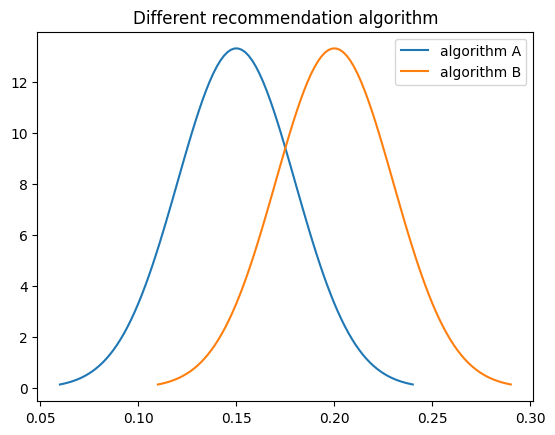

In [23]:
# 生成两组正态分布的数据
# A: N(0.15, 0.03)
# B: N(0.20, 0.03)
# 生成两组正态分布的参数
mu1, sigma1 = 0.15, 0.03 # 均值和标准差
mu2, sigma2 = 0.2, 0.03

# 生成两组数据的概率密度函数的值
x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100) # 生成一个包含100个点的等差数组，范围是均值的正负三倍标准差
y1 = norm.pdf(x1, mu1, sigma1) # 计算概率密度函数的值
x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
y2 = norm.pdf(x2, mu2, sigma2)

# 在一张图上画出两条概率密度函数
plt.plot(x1, y1, label='algorithm A') # 添加标签
plt.plot(x2, y2, label='algorithm B')
plt.legend() # 显示图例
plt.title('Different recommendation algorithm') # 添加标题

# 显示图形
plt.show()
